<a href="https://colab.research.google.com/github/dedemasutti/Python-para-mercado-financeiro/blob/main/python_mercado_financeiro(Visualiza%C3%A7%C3%A3o_de_dados).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##PYTHON PARA MERCADO FINANCEIRO

In [2]:
#IMPORTS
!pip install -q yfinance
import pandas as pd
import pandas_datareader
import numpy as np
from pandas_datareader import data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import yfinance as yf

     |████████████████████████████████| 62 kB 1.8 MB/s 


BASE DE DADOS DE UMA AÇÃO DA BOVESPA

In [36]:
embraer_df = yf.download('EMBR3.SA', start='2021-08-04')

[*********************100%***********************]  1 of 1 completed


In [37]:
embraer_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-08-04,18.910000,19.100000,18.260000,18.320000,18.320000,8129700
2021-08-05,18.500000,18.940001,18.450001,18.620001,18.620001,7754400
2021-08-06,18.549999,19.370001,18.549999,19.230000,19.230000,7023800
2021-08-09,19.059999,19.200001,18.690001,18.980000,18.980000,5333000
2021-08-10,19.200001,19.840000,19.080000,19.600000,19.600000,16310900


In [38]:
embraer_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 254 entries, 2021-08-04 to 2022-08-09
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       254 non-null    float64
 1   High       254 non-null    float64
 2   Low        254 non-null    float64
 3   Close      254 non-null    float64
 4   Adj Close  254 non-null    float64
 5   Volume     254 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.9 KB


In [39]:
embraer_df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-08-03,12.11,12.60,12.10,12.59,12.59,6192700
2022-08-04,12.73,13.52,12.72,13.28,13.28,13025500
2022-08-05,13.30,13.49,13.03,13.36,13.36,4196900
2022-08-08,13.50,13.92,13.38,13.73,13.73,5252400
2022-08-09,13.82,13.89,13.58,13.76,13.76,2613700


In [40]:
embraer_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,254.000000,254.000000,254.000000,254.000000,254.000000,2.540000e+02
mean,17.955236,18.354488,17.529409,17.901220,17.901220,9.845729e+06
std,4.555257,4.656991,4.445941,4.537564,4.537564,4.787263e+06
min,10.850000,11.210000,10.750000,10.870000,10.870000,2.180200e+06
25%,13.492500,13.897500,13.170000,13.450000,13.450000,7.007825e+06
50%,19.135000,19.525000,18.670000,19.130000,19.130000,9.017800e+06
75%,21.875000,22.140000,21.177500,21.549999,21.549999,1.145795e+07
max,26.200001,26.600000,25.760000,26.049999,26.049999,4.287490e+07


In [41]:
#com o código abaixo buscamos a data na qual a ação alcançou o seu maior valor para o periodo
embraer_df[embraer_df['Close'] >= 26.049]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-10-14,26.049999,26.35,25.42,26.049999,26.049999,7026300


In [42]:
# Aqui no código vemos a data com menor valor do periodo 
embraer_df[(embraer_df['Close'] >= 10.86) & (embraer_df['Close'] <= 10.87 )]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-07-11,11.33,11.39,10.86,10.87,10.87,7560000


TRANSFORMANDO EM ARQUIVO .CSV

In [43]:
embraer_df.to_csv('embraer.csv')

In [44]:
embraer_df2= pd.read_csv('embraer.csv')
embraer_df2.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-08-04,18.910000,19.100000,18.260000,18.320000,18.320000,8129700
1,2021-08-05,18.500000,18.940001,18.450001,18.620001,18.620001,7754400
2,2021-08-06,18.549999,19.370001,18.549999,19.230000,19.230000,7023800
3,2021-08-09,19.059999,19.200001,18.690001,18.980000,18.980000,5333000
4,2021-08-10,19.200001,19.840000,19.080000,19.600000,19.600000,16310900


#Base de dados com mais ações

In [45]:
acoes = ['USIM5.SA', 'ITUB4.SA','TOTS3.SA','JHSF3.SA','WEGE3.SA','BOVA11.SA']

In [46]:
acoes_df = pd.DataFrame()
for acao in acoes:
  #acoes_df[acao] = data.DataReader(acao, data_source='yahoo', start='2019-01-01')['Close']   pode ser que o método DataReader não funcione, então há a alternativa abaixo
  acoes_df[acao] = yf.download(acao, start='2020-01-01')['Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [47]:
acoes_df

,USIM5.SA,ITUB4.SA,TOTS3.SA,JHSF3.SA,WEGE3.SA,BOVA11.SA
Date,,,,,,
2020-01-02,9.70,38.029999,23.049999,7.60,17.620001,114.239998
2020-01-03,9.60,37.630001,23.540001,8.12,17.395000,113.800003
2020-01-06,9.42,37.070000,23.003332,8.16,17.440001,112.589996
2020-01-07,9.51,36.209999,23.100000,8.23,17.575001,112.239998
2020-01-08,9.39,35.619999,22.790001,8.10,16.910000,111.949997
...,...,...,...,...,...,...
2022-08-03,8.44,23.889999,27.170000,5.66,28.120001,100.199997
2022-08-04,8.92,24.469999,27.600000,6.01,28.809999,102.480003
2022-08-05,8.76,24.930000,26.959999,5.90,28.830000,102.739998


In [48]:
#Vamos renomear as açoes pelos nomes das respectivas empresas
acoes_df = acoes_df.rename(columns={'USIM5.SA':'USIMINAS','ITUB4.SA':'ITAU','TOTS3.SA':'TOTVS','JHSF3.SA':'JHFS','WEGE3.SA':'WEG',})

In [49]:
# nomes das ações renomeadas
acoes_df.head()

,USIMINAS,ITAU,TOTVS,JHFS,WEG,BOVA11.SA
Date,,,,,,
2020-01-02,9.70,38.029999,23.049999,7.60,17.620001,114.239998
2020-01-03,9.60,37.630001,23.540001,8.12,17.395000,113.800003
2020-01-06,9.42,37.070000,23.003332,8.16,17.440001,112.589996
2020-01-07,9.51,36.209999,23.100000,8.23,17.575001,112.239998
2020-01-08,9.39,35.619999,22.790001,8.10,16.910000,111.949997


In [50]:
# ver se temos valores nulos
#nenhum valor nulo. Caso houvessem valores nulos. o código para alterar isso seria: acoes_df.dropna(inplace=True)
acoes_df.isnull().sum()

USIMINAS     0
ITAU         0
TOTVS        0
JHFS         0
WEG          0
BOVA11.SA    0
dtype: int64

In [51]:
#transforma esses dados com algum tratamento em um arquivo .csv
acoes_df.to_csv('acoes.csv')
acoes_df

,USIMINAS,ITAU,TOTVS,JHFS,WEG,BOVA11.SA
Date,,,,,,
2020-01-02,9.70,38.029999,23.049999,7.60,17.620001,114.239998
2020-01-03,9.60,37.630001,23.540001,8.12,17.395000,113.800003
2020-01-06,9.42,37.070000,23.003332,8.16,17.440001,112.589996
2020-01-07,9.51,36.209999,23.100000,8.23,17.575001,112.239998
2020-01-08,9.39,35.619999,22.790001,8.10,16.910000,111.949997
...,...,...,...,...,...,...
2022-08-03,8.44,23.889999,27.170000,5.66,28.120001,100.199997
2022-08-04,8.92,24.469999,27.600000,6.01,28.809999,102.480003
2022-08-05,8.76,24.930000,26.959999,5.90,28.830000,102.739998


VISUALIZAÇÃO POR HISTOGRAMA

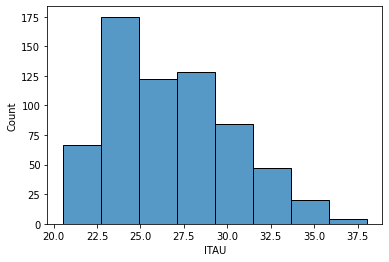

In [52]:
sns.histplot(acoes_df['ITAU'], bins = 8)

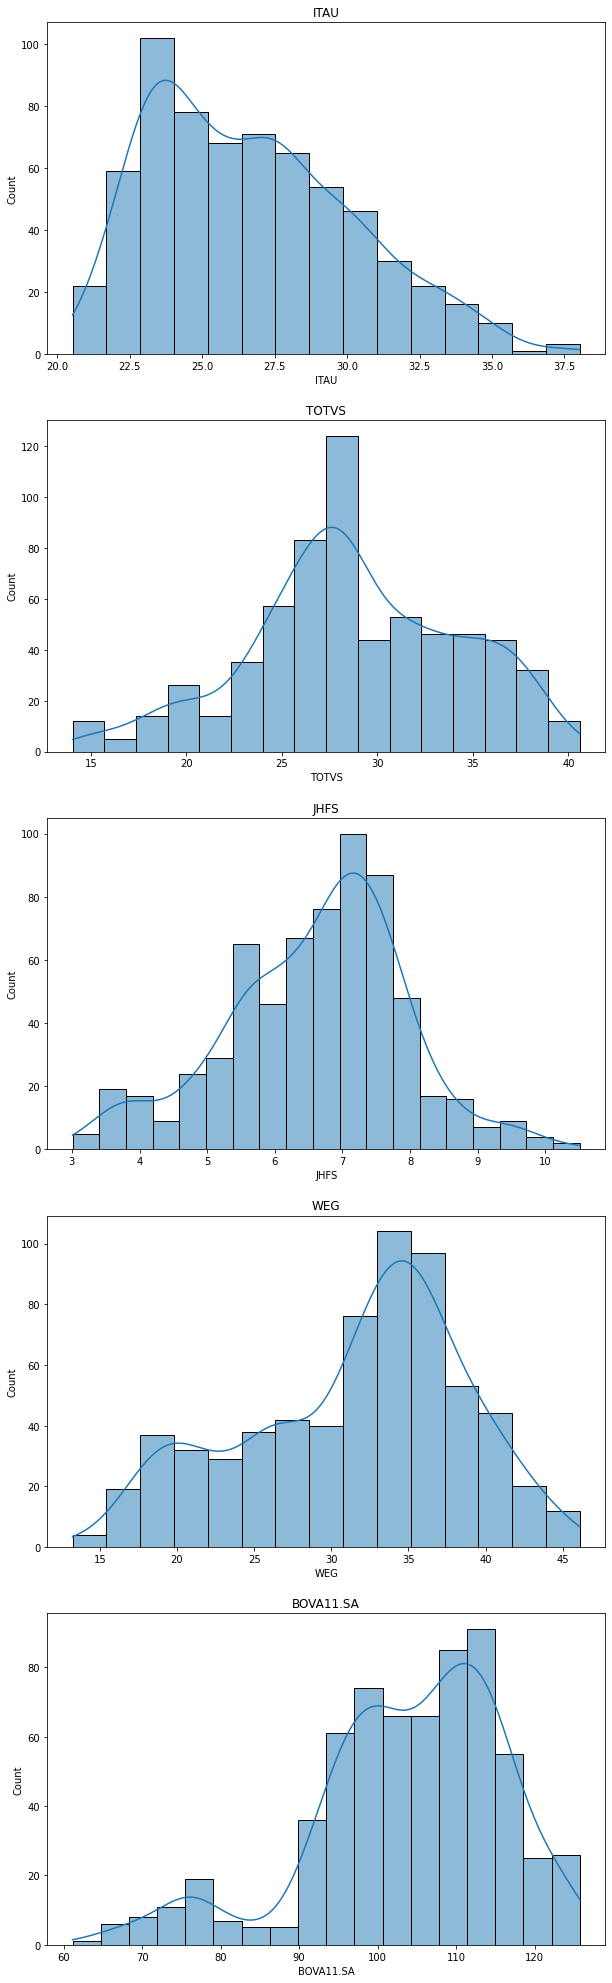

In [53]:
# Esse gráfico demonstra a quantidade de vezes que os valores se repetem, ou seja, no eixo x os valores e no eixo y a quantidade de vezes que as ações se apresentam.
plt.figure(figsize=(10,50))
i = 1
for i in np.arange(1, len(acoes_df.columns)):
  plt.subplot(7, 1 , i+1)
  sns.histplot(acoes_df[acoes_df.columns[i]], kde = True)
  plt.title(acoes_df.columns[i])

BOXPLOT

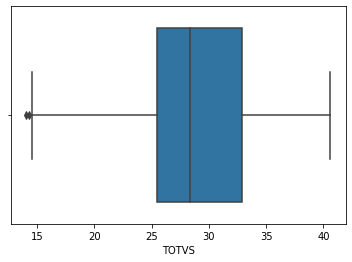

In [54]:
sns.boxplot(x = acoes_df['TOTVS'])

In [55]:
acoes_df['TOTVS'].describe()

count    647.000000
mean      28.775384
std        5.503987
min       14.033333
25%       25.513332
50%       28.320000
75%       32.920000
max       40.599998
Name: TOTVS, dtype: float64

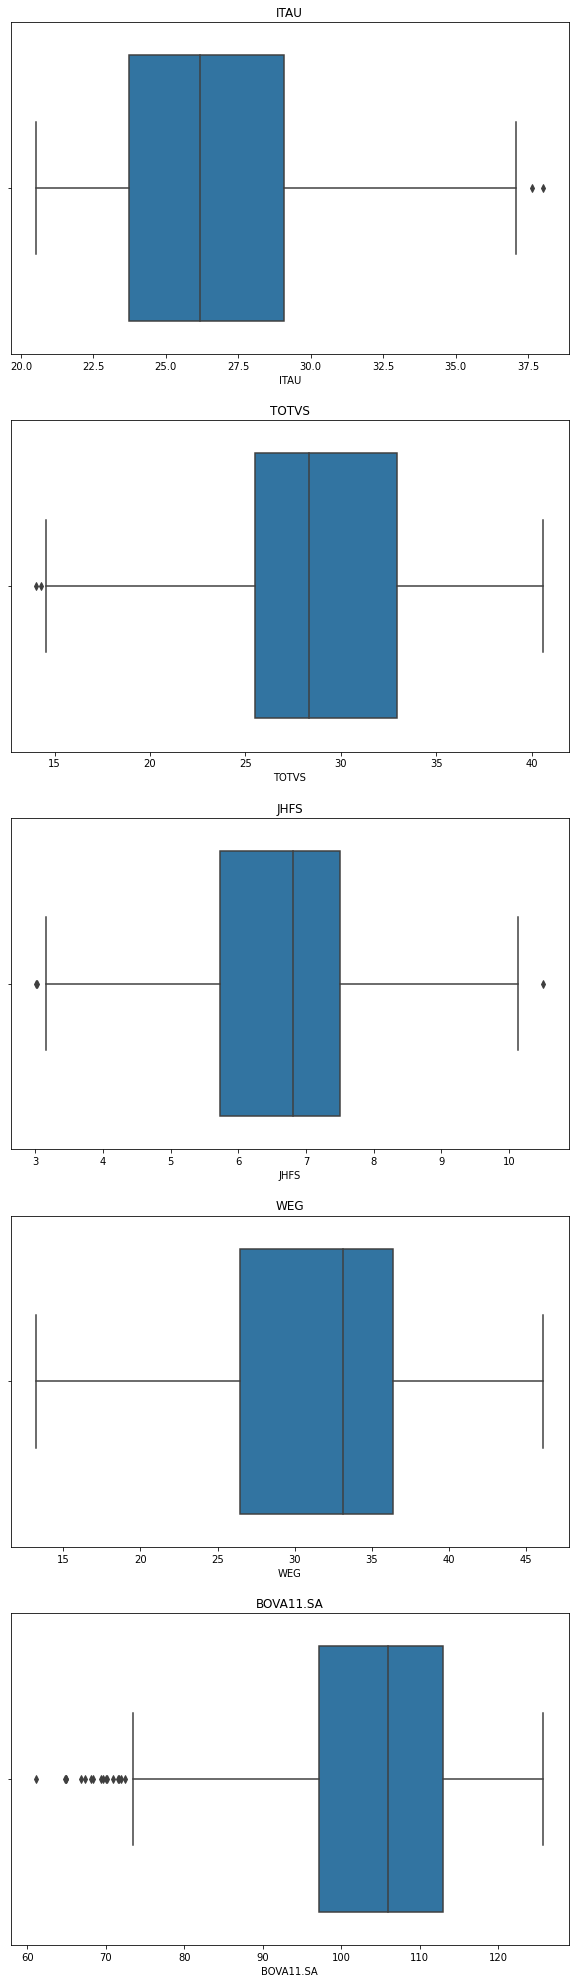

In [56]:
# O código abaixo faz os gráficos plot das cinco ações 
plt.figure(figsize=(10,50))
i = 1
for i in np.arange(1, len(acoes_df.columns)):
  plt.subplot(7, 1 , i+1)
  sns.boxplot(x = acoes_df[acoes_df.columns[i]])
  plt.title(acoes_df.columns[i])

GRÁFICOS DE LINHAS

In [57]:
acoes_df

,USIMINAS,ITAU,TOTVS,JHFS,WEG,BOVA11.SA
Date,,,,,,
2020-01-02,9.70,38.029999,23.049999,7.60,17.620001,114.239998
2020-01-03,9.60,37.630001,23.540001,8.12,17.395000,113.800003
2020-01-06,9.42,37.070000,23.003332,8.16,17.440001,112.589996
2020-01-07,9.51,36.209999,23.100000,8.23,17.575001,112.239998
2020-01-08,9.39,35.619999,22.790001,8.10,16.910000,111.949997
...,...,...,...,...,...,...
2022-08-03,8.44,23.889999,27.170000,5.66,28.120001,100.199997
2022-08-04,8.92,24.469999,27.600000,6.01,28.809999,102.480003
2022-08-05,8.76,24.930000,26.959999,5.90,28.830000,102.739998


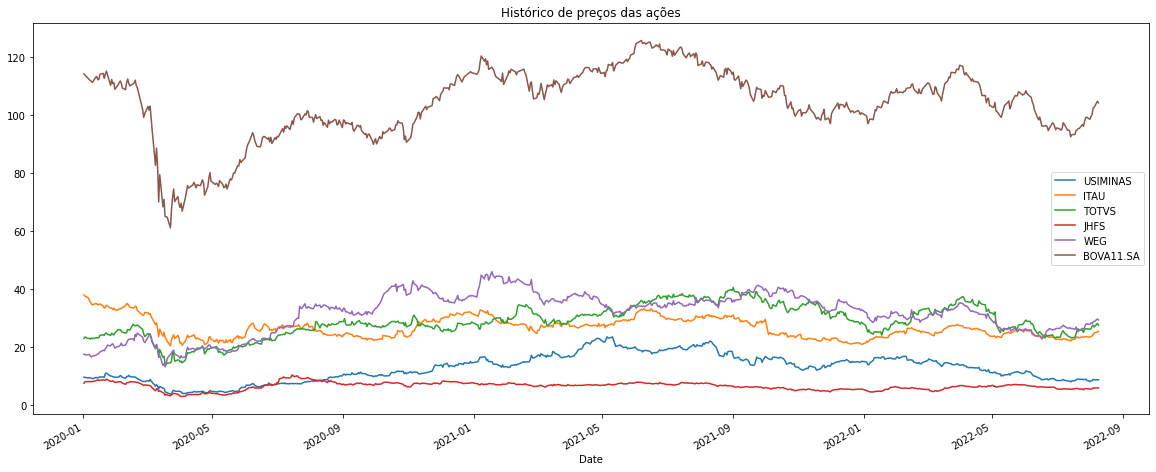

In [58]:
acoes_df.plot(figsize = (20,8), title = 'Histórico de preços das ações')

NORMALIZAÇÃO DAS BASES DE DADOS

In [59]:
acoes_df_normalizados = acoes_df.copy()
for i in acoes_df_normalizados.columns[0:]:
  acoes_df_normalizados[i] = acoes_df_normalizados[i] / acoes_df_normalizados[i] [0]

In [60]:
# Aqui, podemos acompanhar quantos rendeu dia a dia cada ação a partir do primeiro dia que buscamos no código
## Exemplo: Na ação do ITAU podemos observar que hoje(08-08-2022) a ação vale 0.663 de quando foi comprada no dia 02-01-2020, ou seja, depreciou. Ao contrário da ação da WEG
acoes_df_normalizados

,USIMINAS,ITAU,TOTVS,JHFS,WEG,BOVA11.SA
Date,,,,,,
2020-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2020-01-03,0.989691,0.989482,1.021258,1.068421,0.987230,0.996149
2020-01-06,0.971134,0.974757,0.997975,1.073684,0.989784,0.985557
2020-01-07,0.980412,0.952143,1.002169,1.082895,0.997446,0.982493
2020-01-08,0.968041,0.936629,0.988720,1.065790,0.959705,0.979954
...,...,...,...,...,...,...
2022-08-03,0.870103,0.628188,1.178742,0.744737,1.595914,0.877101
2022-08-04,0.919588,0.643439,1.197397,0.790790,1.635074,0.897059
2022-08-05,0.903093,0.655535,1.169631,0.776316,1.636209,0.899335


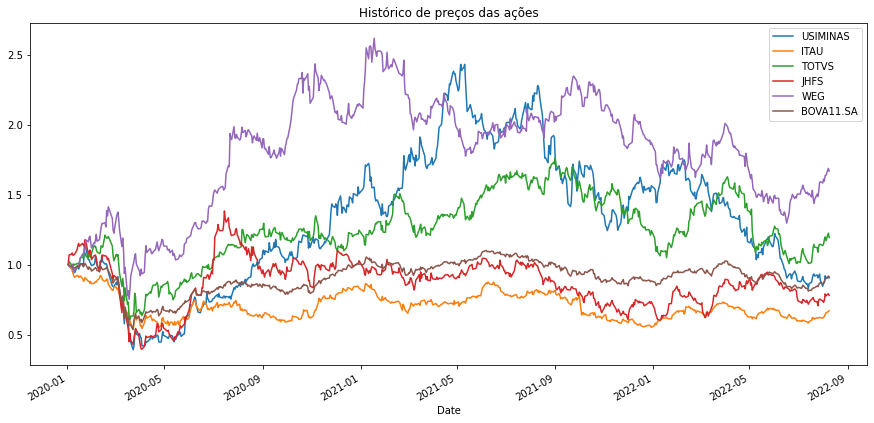

In [61]:
acoes_df_normalizados.plot(figsize = (15,7), title = 'Histórico de preços das ações')

GRÁFICO DINÂMICO

In [62]:
figura = px.line(title = 'Histórico de preços das ações')
for i in acoes_df.columns[1:]:
  figura.add_scatter( y = acoes_df[i], name = i)
  figura.show()

In [63]:
figura = px.line(title = 'Histórico de preços das ações - com normalização')
for i in acoes_df_normalizados.columns[1:]:
  figura.add_scatter( y = acoes_df_normalizados[i], name = i)
  figura.show()

#Gerando outra base de dados

Vamos utilizar dados de outras ações da BOVESPA

In [4]:
acoes_2 = ['BBAS3.SA', 'PETR4.SA','ABEV3.SA','EMBR3.SA', 'ELET6.SA']

In [5]:
acoes_2_df = pd.DataFrame()
for acao in acoes_2:
  #acoes_df[acao] = data.DataReader(acao, data_source='yahoo', start='2019-01-01')['Close']   pode ser que o método DataReader não funcione, então há a alternativa abaixo
  acoes_2_df[acao] = yf.download(acao, start='2020-01-01')['Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [6]:
acoes_2_df

,BBAS3.SA,PETR4.SA,ABEV3.SA,EMBR3.SA,ELET6.SA
Date,,,,,
2020-01-02,53.799999,30.700001,19.200001,20.200001,38.709999
2020-01-03,53.709999,30.450001,18.930000,20.410000,38.549999
2020-01-06,53.000000,30.809999,19.020000,20.379999,38.610001
2020-01-07,52.599998,30.690001,19.059999,20.500000,39.200001
2020-01-08,52.119999,30.500000,18.969999,20.330000,39.529999
...,...,...,...,...,...
2022-08-03,36.410000,33.849998,14.630000,12.590000,48.650002
2022-08-04,37.099998,34.209999,14.680000,13.280000,50.439999
2022-08-05,37.790001,34.869999,14.600000,13.360000,50.180000


In [7]:
acoes_2_df.describe()

,BBAS3.SA,PETR4.SA,ABEV3.SA,EMBR3.SA,ELET6.SA
count,647.000000,647.000000,647.000000,647.000000,647.000000
mean,33.531901,26.180479,15.013153,14.191345,36.204900
std,5.186161,4.853491,1.823594,5.543194,5.368393
min,22.129999,11.290000,11.030000,6.030000,18.480000
25%,30.190001,22.809999,13.820000,8.840000,32.775000
50%,32.730000,27.180000,14.930000,13.740000,35.790001
75%,34.849998,29.360001,16.080000,19.110001,39.865000
max,53.799999,37.209999,19.600000,26.049999,50.689999


In [8]:
# Vamos ver se temos valores nulos. Nesse caso não há nenhum valor nulo.
acoes_2_df.isnull().sum()

BBAS3.SA    0
PETR4.SA    0
ABEV3.SA    0
EMBR3.SA    0
ELET6.SA    0
dtype: int64

Transformando em arquivo .csv

In [9]:
acoes_2_df.to_csv('acoes_2.csv')
acoes_2_df

,BBAS3.SA,PETR4.SA,ABEV3.SA,EMBR3.SA,ELET6.SA
Date,,,,,
2020-01-02,53.799999,30.700001,19.200001,20.200001,38.709999
2020-01-03,53.709999,30.450001,18.930000,20.410000,38.549999
2020-01-06,53.000000,30.809999,19.020000,20.379999,38.610001
2020-01-07,52.599998,30.690001,19.059999,20.500000,39.200001
2020-01-08,52.119999,30.500000,18.969999,20.330000,39.529999
...,...,...,...,...,...
2022-08-03,36.410000,33.849998,14.630000,12.590000,48.650002
2022-08-04,37.099998,34.209999,14.680000,13.280000,50.439999
2022-08-05,37.790001,34.869999,14.600000,13.360000,50.180000


HISTOGRAMA

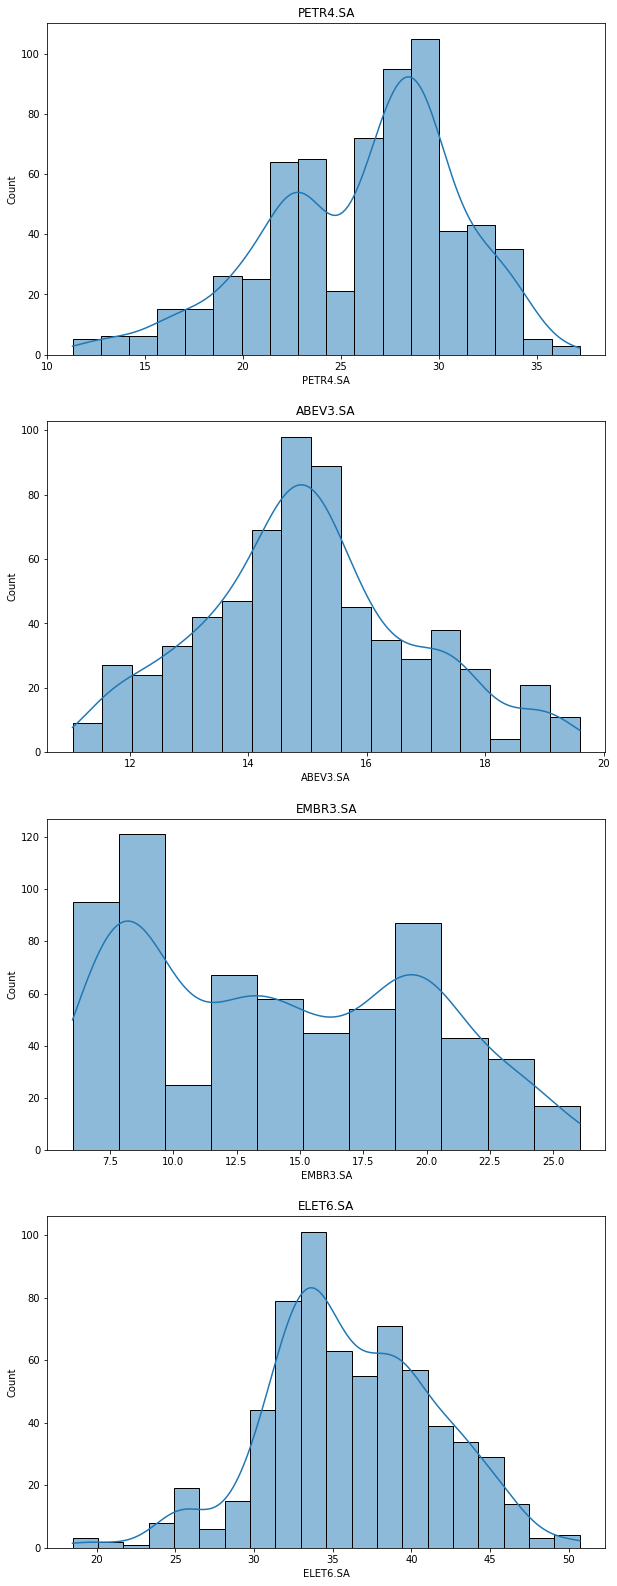

In [10]:
# Esse gráfico demonstra a quantidade de vezes que os valores se repetem, ou seja, no eixo x os valores e no eixo y a quantidade de vezes que as ações se apresentam.
plt.figure(figsize=(10,50))
i = 1
for i in np.arange(1, len(acoes_2_df.columns)):
  plt.subplot(7, 1 , i+1)
  sns.histplot(acoes_2_df[acoes_2_df.columns[i]], kde = True)
  plt.title(acoes_2_df.columns[i])

BOXPLOT

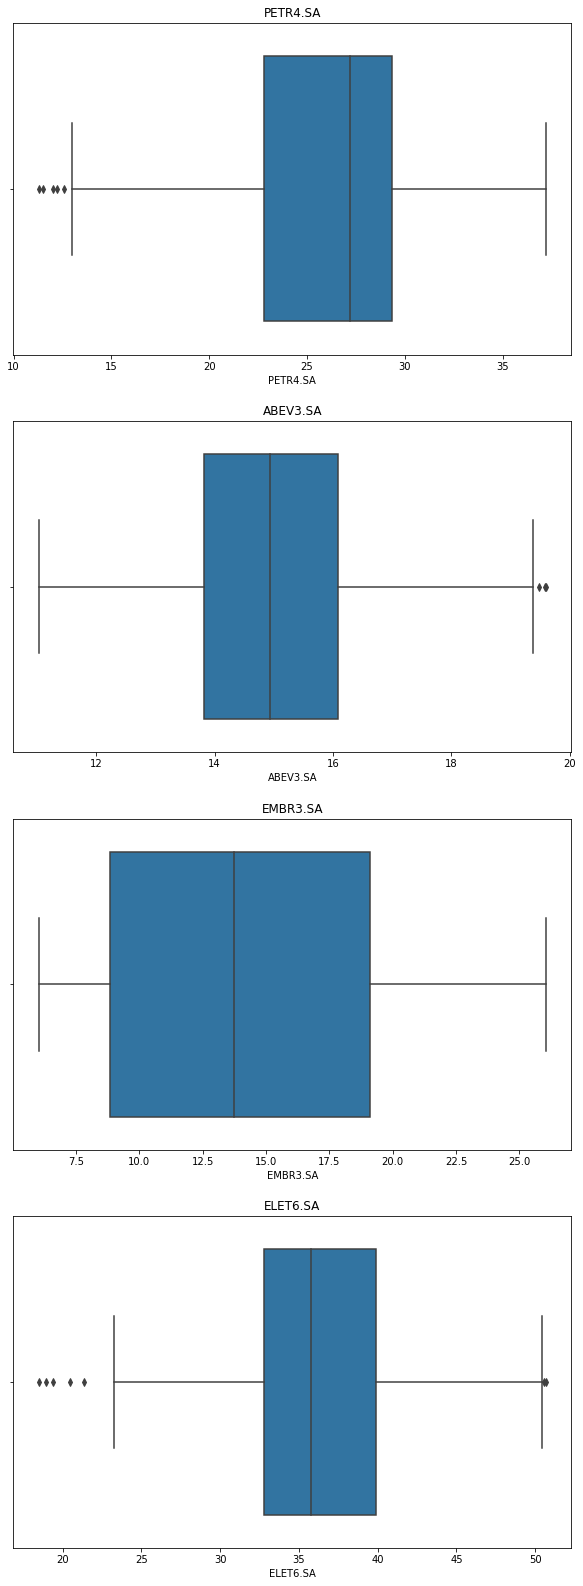

In [11]:
plt.figure(figsize=(10,50))
i = 1
for i in np.arange(1, len(acoes_2_df.columns)):
  plt.subplot(7, 1 , i+1)
  sns.boxplot(x = acoes_2_df[acoes_2_df.columns[i]])
  plt.title(acoes_2_df.columns[i])

GRÁFICO DE LINHAS


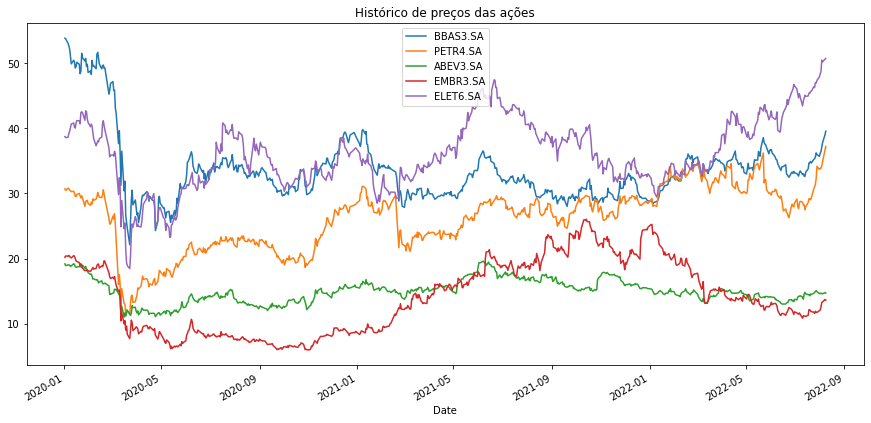

In [12]:
from IPython.core.pylabtools import figsize
acoes_2_df.plot(figsize = (15,7), title = ('Histórico de preços das ações'))

DADOS NORMALIZADOS

In [13]:
dados_normalizados2 = acoes_2_df.copy()
for i in dados_normalizados2.columns[0:]:
  dados_normalizados2[i] = dados_normalizados2[i] / dados_normalizados2[i] [0]

In [14]:
dados_normalizados2

,BBAS3.SA,PETR4.SA,ABEV3.SA,EMBR3.SA,ELET6.SA
Date,,,,,
2020-01-02,1.000000,1.000000,1.000000,1.000000,1.000000
2020-01-03,0.998327,0.991857,0.985937,1.010396,0.995867
2020-01-06,0.985130,1.003583,0.990625,1.008911,0.997417
2020-01-07,0.977695,0.999674,0.992708,1.014851,1.012658
2020-01-08,0.968773,0.993485,0.988021,1.006436,1.021183
...,...,...,...,...,...
2022-08-03,0.676766,1.102606,0.761979,0.623267,1.256781
2022-08-04,0.689591,1.114332,0.764583,0.657426,1.303022
2022-08-05,0.702416,1.135831,0.760417,0.661386,1.296306


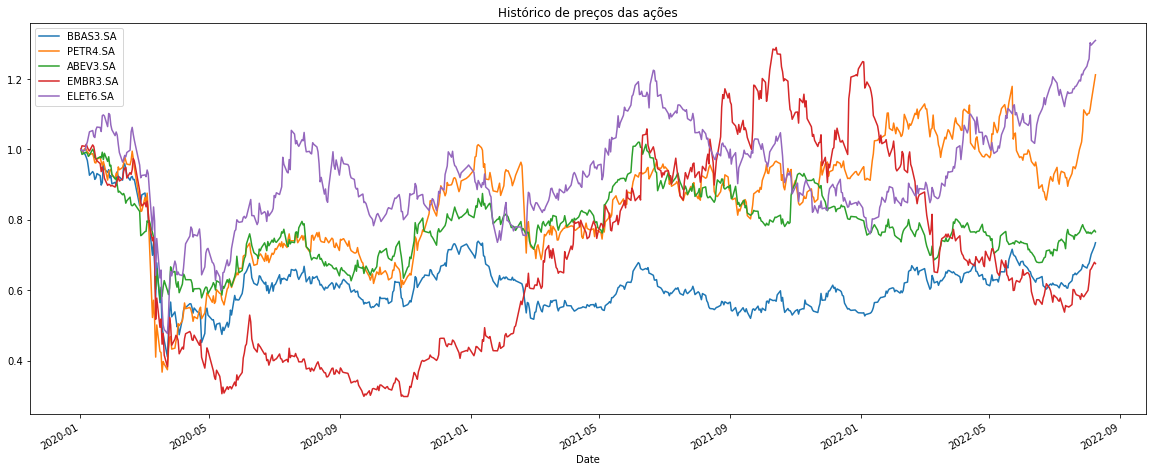

In [15]:
dados_normalizados2.plot(figsize = (20,8), title = ('Histórico de preços das ações'))

In [16]:
gráfico = px.line(title = 'Histórico de preços das ações')
for i in acoes_2_df.columns[0:]:
  gráfico.add_scatter( y = acoes_2_df[i], name = i)
  gráfico.show()

GRÁFICO DINÂMICO

In [17]:
figura = px.line(title = 'Histórico de preços das ações')
for i in acoes_2_df.columns[0:]:
  figura.add_scatter( y = acoes_2_df[i], name = i)
  figura.show()